In [1]:
# import relevant dependencies 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# retrieve mnist dataset from tensorflow
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# check shape of training data
training_images.shape

(60000, 28, 28)

In [5]:
# reshape data such that it is a single tensor. Divide by 255 to normalize
training_images = training_images.reshape(60000, 28, 28, 1) / 255.0

In [6]:
# check shape of test data
test_images.shape

(10000, 28, 28)

In [7]:
# same reshaping as with training data
test_images = test_images.reshape(10000, 28, 28, 1) / 255.0

In [8]:
# create model 
model = tf.keras.models.Sequential([
    # 64 represents the number of filters to test, (3, 3) are the dimensions for said filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
# compile model then summarize parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
history = model.fit(training_images, training_labels, epochs=10, validation_data=(test_images,test_labels))
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.4423 - accuracy: 0.8379 - val_loss: 0.3295 - val_accuracy: 0.8806
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2965 - accuracy: 0.8902 - val_loss: 0.3165 - val_accuracy: 0.8852
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2505 - accuracy: 0.9070 - val_loss: 0.2633 - val_accuracy: 0.9038
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2182 - accuracy: 0.9187 - val_loss: 0.2595 - val_accuracy: 0.9060
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1935 - accuracy: 0.9283 - val_loss: 0.2563 - val_accuracy: 0.9086
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1703 - accuracy: 0.9364 - val_loss: 0.2573 - val_accuracy: 0.9087
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1526 - accuracy: 0.9427 - val_loss: 0.2647 - val_accuracy

In [11]:
acc = history.history['accuracy']
lss = history.history['loss']
va = history.history['val_accuracy']
vl = history.history['val_loss']

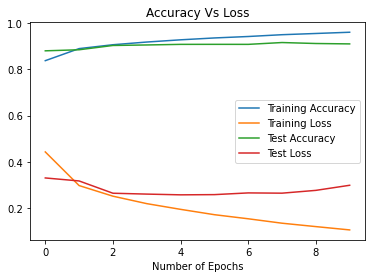

In [12]:
# Accuracy is higher compared to simple neural network. After 5 epochs, little progress is made in accuracy, 
# and loss function diverges. Adding additional epochs would result in overfitting
plt.plot(acc, label='Training Accuracy')
plt.plot(lss, label='Training Loss')
plt.plot(va, label='Test Accuracy')
plt.plot(vl, label= "Test Loss")
plt.legend()
plt.title("Accuracy Vs Loss")
plt.xlabel("Number of Epochs")
plt.show()